Example inspired in the book "Python for Algorithmic Trading" by Yves Hilpisch, chapter 4, section "Strategies based on Simple Moving Averages"

In [2]:
import pandas as pd

In [4]:
# Download  end-of-day (EOD) closing data for the EUR/USD exchange rate, as provided in the csv file under the EOD data file.
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [5]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [11]:
data = pd.DataFrame(raw['EUR='])
data.rename(columns={'EUR=': 'Price'}, inplace=True)
data.head()

,Price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [12]:
# Calculate the simple moving average (SMA) of the closing prices
data['SMA1'] = data['Price'].rolling(window=42).mean()
data['SMA2'] = data['Price'].rolling(window=252).mean()
data


,Price,SMA1,SMA2
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN
...,...,...,...
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428


In [13]:
# Plot the closing prices and the SMAs
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

data.plot(title='EUR/USD | 42 & 252 days SMAs',
          figsize=(10, 6));


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

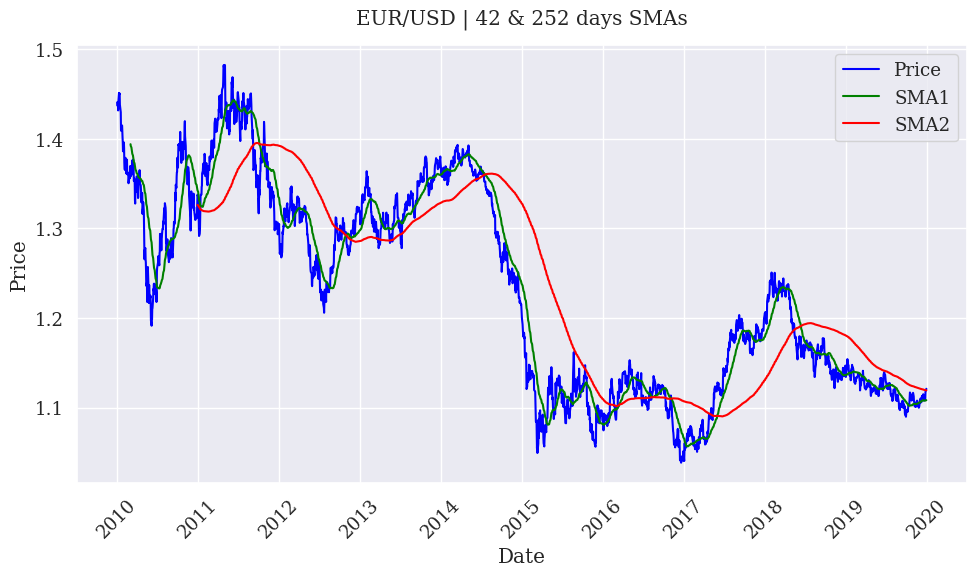

In [20]:
%matplotlib inline
import seaborn as sns

# Configurar o estilo do seaborn
sns.set_theme(style="darkgrid", font="serif", palette="deep")
sns.set_context("notebook", font_scale=1.2)  # Aumenta o tamanho da fonte
plt.figure(figsize=(10, 6))

# Mesmo plot com cores personalizadas
sns.lineplot(data=data,palette=['blue', 'green', 'red'], dashes=False)

# Configurar o título e labels
plt.title('EUR/USD | 42 & 252 days SMAs', pad=15)
plt.xlabel('Date')
plt.ylabel('Price')

# Ajustar a rotação dos labels do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()